In [ ]:
#!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Added for colormap

import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 101.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data = data.drop(columns = 'CustomerID')

KeyError: "['CustomerID'] not found in axis"

In [ ]:
data.select_dtypes(exclude = 'object')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [ ]:
data_scaled_numerical = pd.DataFrame(StandardScaler().fit_transform(data.select_dtypes(exclude = 'object')), columns = data.select_dtypes(exclude = 'object').columns)

In [ ]:
data_scaled_numerical

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


In [ ]:
data = pd.concat([data.select_dtypes(include = 'object'), data_scaled_numerical], axis = 1)

In [ ]:
data['Genre'].replace({'Male': 0, 'Female': 1}, inplace = True)

In [ ]:
data

,Genre,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.723412,-1.424569,-1.738999,-0.434801
1,0,-1.706091,-1.281035,-1.738999,1.195704
2,1,-1.688771,-1.352802,-1.700830,-1.715913
3,1,-1.671450,-1.137502,-1.700830,1.040418
4,1,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1,1.654129,-0.276302,2.268791,1.118061
196,1,1.671450,0.441365,2.497807,-0.861839
197,0,1.688771,-0.491602,2.497807,0.923953
198,0,1.706091,-0.491602,2.917671,-1.250054


In [ ]:
linkage_data = linkage(data, method = 'ward')

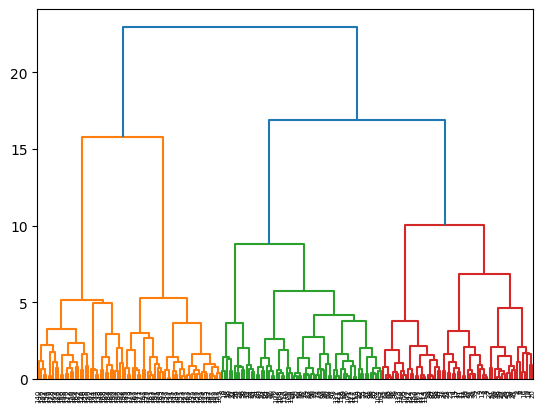

In [ ]:
dendrogram(linkage_data)
plt.show()

In [ ]:
hr_cluster = AgglomerativeClustering(n_clusters=6,metric = 'euclidean')

In [ ]:
hr_cluster.fit(data)

AgglomerativeClustering(n_clusters=6)

In [ ]:
data_ori = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data_ori['hr_label'] = hr_cluster.fit_predict(data)

In [ ]:
data_ori

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),hr_label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [ ]:
data_ori['Genre'].replace({'Male': 0, 'Female': 1}, inplace = True)

In [ ]:
data_ori.groupby('hr_label').mean()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
hr_label,,,,,
0,27.081081,0.648649,27.270270,27.972973,62.810811
1,162.000000,0.538462,32.692308,86.538462,82.128205
2,83.607843,0.568627,54.137255,54.313725,48.862745
3,164.428571,0.428571,41.685714,88.228571,17.285714
4,99.375000,0.583333,22.958333,60.291667,49.166667
5,26.857143,0.642857,51.071429,28.357143,16.857143


In [ ]:
# Cluster 0: Oldest, Income Medium, Spending Medium
# Cluster 1: Lowest Income, Spending Low
# Cluster 2: Highest Income, Lowest Spending, More Male
# Cluster 3: High Income, Highest Spending
# Cluster 4: Young Age, Medium Income, Medium Spending, More Female
# Cluster 5: Young, Low Income, High Spending

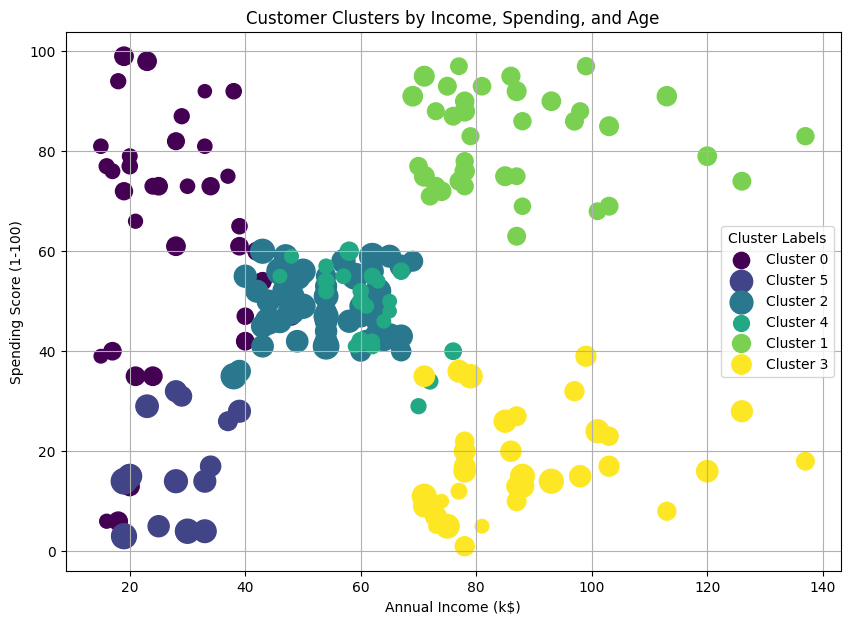

In [ ]:
# Get unique cluster labels
unique_labels = data_ori['hr_label'].unique()

# Choose a colormap
colors = cm.get_cmap('viridis', len(unique_labels))

plt.figure(figsize=(10, 7)) # Set a larger figure size for better visibility

for i, label in enumerate(unique_labels):
    subset = data_ori[data_ori['hr_label'] == label]
    plt.scatter(
        subset['Annual Income (k$)'],
        subset['Spending Score (1-100)'],
        s=subset['Age'] * 5,  # Size points by Age, scaled for better visual distinction
        color=colors(i),      # Assign a unique color for each cluster
        label=f'Cluster {label}' # Label for the legend
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters by Income, Spending, and Age') # Added a title
plt.legend(title='Cluster Labels') # Added legend with a title
plt.grid(True) # Added grid for readability
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
print(silhouette_score(data, hr_cluster.fit_predict(data)))

0.33984292306629277
